Dr Oliviero Andreussi, olivieroandreuss@boisestate.edu

Boise State University, Department of Chemistry and Biochemistry

# Introduction to Errors and Statistics

Before we start, let us import the main modules that we will need for this lecture. You will see some new modules in the list below, we will add more details in the right sections.

In [23]:
import numpy as np
import matplotlib.pyplot as plt

## A Stochastic Model of Experimental Errors

We will consider a simple model of an experimental measuring process. Let us assume that we are measuring a property $x$, whose exact value is $x_0$. However, our measure is subject to some small errors, that can randomly affect the measured result, either by adding or by subtracting a small amount $\epsilon$: each time we take a measure of $x$ we can think that we toss a fair coin and, if we get head, we add $\epsilon$ to the true value, otherwise we subtract $\epsilon$ from the true value. We can code this process using a random number between 0 and 1 as our coin toss, if the random number is lower than $p=0.5$ we consider it as getting a head on the coin toss. 

In [24]:
# simulation setup
x0 = 1.
epsilon = 0.01
p_success = 0.5
#
# starting guess of our results
x = x0 # we will start assuming our measure is the exact value
# 
# we start the stochastic process by picking a random number
cointoss = np.random.random() # no argument means we only need one random number
if cointoss < p_success : 
    # our random number is less than 0.5, it's a head
    x = x + epsilon
else :
    # our random number is greater than 0.5, it's a tail 
    x = x - epsilon
#
# report the result
print(x)

1.01


If we repeat the measuring process multiple times, $M$, what do you expect to be the distribution of results? Think about it before running the code below.

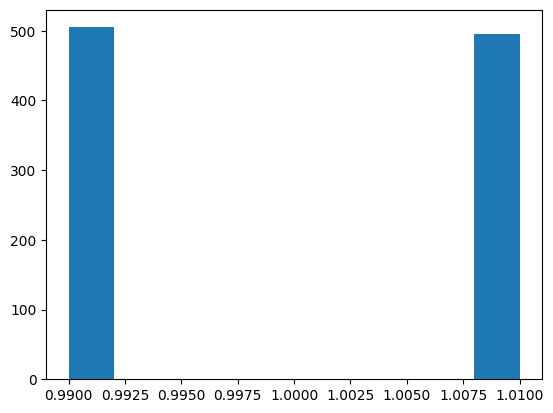

In [25]:
# simulation setup
x0 = 1.
epsilon = 0.01
p_success = 0.5
n_measures = 1000 # our name for M
#
# starting guess of our results
x = np.ones(n_measures) * x0
#
# stochastic process
for i in range(n_measures):
    cointoss=np.random.random() # no argument means we only need one random number
    if cointoss < p_success : 
        # our random number is less than 0.5, it's a head
        x[i] = x[i] + epsilon
    else :
        # our random number is greater than 0.5, it's a tail 
        x[i] = x[i] - epsilon
#
# report the results
plt.hist(x) # this function of matplotlib.pyplot is very useful to plot distributions
plt.show()

In the example above we only had one random source of errors. In general, when we perform an experimental measure we have a very large number, $N$, of sources of errors, each contributing a small random error to our measured quantity. We can extend our model above to consider multiple sources of errors as follows. For a sake of keeping the model simple, we will assume all sources of errors will have the same effect ($\epsilon$) on the measured quantity and they are not correlated.

In [26]:
# simulation setup 
x0 = 1.
epsilon = 0.01
p_success = 0.5
n_sources = 3 # this is our name for N
# 
# starting guess of our measure
x = x0
#
# stochastic process
cointosses=np.random.random(n_sources) # we draw multiple random numbers, one for each source of error
for cointoss in cointosses : # for each random number we check wether to add or subtract the error
    if cointoss < p_success :
        # our random number is less than 0.5, it's a head
        x = x + epsilon
    else :
        # our random number is greater than 0.5, it's a tail 
        x = x - epsilon
#
# report the result
print(x)

1.01


 We can now repeat this process for multiple measuring attempts and collect the distribution of results. 

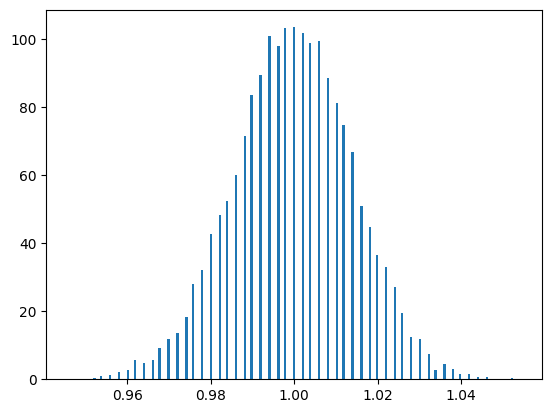

In [27]:
# simulation setup
x0=1.
epsilon=0.001
p_success = 0.5
n_sources = 200
n_measures = 10000
#
# starting guess of our measures
x = np.ones(n_measures) * x0
#
# stochastic model
for i in range(n_measures):
    cointosses=np.random.random(n_sources) # no argument means we only need one random number
    for cointoss in cointosses :
        if cointoss < p_success :
            # our random number is less than 0.5, it's a head
            x[i] = x[i] + epsilon
        else :
            # our random number is greater than 0.5, it's a tail 
            x[i] = x[i] - epsilon
#
binomial,bins,_=plt.hist(x,bins=n_sources+1,density=True) 
plt.show()

> CALLENGE 1: How does the measured quantity depend on the parameters of our stochastic model ($M$, $\epsilon$, $N$, $p$)? In particular, how does the **precision** of our measure depend on the parameters? How does the **accuracy** of our measure depend on the parameters? 

The process described above is an example of a Bernoulli process, for which the number of successes in $N$ trials is given by the Binomial distribution. As $N$ becomes large, the Binomial distribution becomes indistingishable from a Gaussian (a.k.a. normal) distribution. For this reason, when looking at random uncorrelated measurement errors we can assume our measures are distributed according to a normal distribution. How are the parameters of a normal distribution connected to the ones of the Bernoulli process?

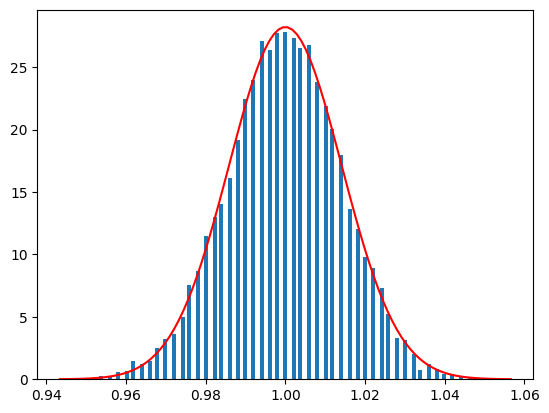

In [28]:
mu = x0 + n_sources*(2*p_success-1)*epsilon
sigma = np.sqrt(n_sources*p_success*(1-p_success)*4)*epsilon
xg = np.linspace(mu-4*sigma,mu+4*sigma,100)
gaussian = 1/np.sqrt(2*np.pi)/sigma*np.exp(-(xg-mu)**2/2/sigma**2)
plt.plot(xg,gaussian,'r')
plt.bar((bins[:-1]+bins[1:])/2,height=binomial*(bins[1]-bins[0])/2/epsilon,width=epsilon)
plt.show()

## Sampling Problem

Whenever we repeat our measurements, we get a better idea of the ideal distribution from which we are sampling. Cleaerly, in the limit of an infinite number of measurements, the distribution of our measures will look very similar to a Gaussian centered on the correct value. How can we use the sample of measurements to predict $x_0$? How good is our estimate and how does it depend on the number of measures? Statistics, and in particular the Central Limit Theorem, help answering these questions. 

By looking at the results above, we realize that the best estimate of our true value is given by the center of the distribution of measured values. There are different ways to compute the center of a distribution of values, the most effective is the mean, $\bar{x}=\frac{1}{N}\sum x_i$. We can compute the mean using a simple for loop 

In [29]:
mean=0.0
for value in x : 
    mean = mean + value 
mean = mean/n_measures
print(mean)

0.9997429999999997


Similarly, we can estimate the spread of our sample distribution in terms of its variance, $\sigma^2=\frac{1}{N-1}\sum (x_i-\bar{x})^2$, or its standard deviation, $\sigma$

>CHALLENGE 2: Write a for loop to compute the variance of the measurement results using the formula above

However, Numpy has some shortcuts to compute statistical properties (mean, standard deviation, variance, etc.) of values stored in a Numpy array:

In [30]:
print("The measurements have a mean of {:.5f}, a variance of {:.5f}, and a standard deviation of {:.5f}".format(x.mean(),x.var(ddof=1),x.std(ddof=1)))

The measurements have a mean of 0.99974, a variance of 0.00020, and a standard deviation of 0.01428


In the code above, we passed to the variance and standard deviation a quantity called `ddof`, which stands for delta degrees of freedom, and is the number that we subtract to the total number of measures in the denominator of the formula for the variance. In this case, we set it equal to one because we are computing the variance with respect to the mean, but the mean was computed on the sample, it is not an independent parameter. Since we used the data to compute the mean, we have one less degree of freedom to compute the variance. As an alternative definition, this number enforces the fact that we cannot compute a variance for a sample with only one measurement. 

We have just seen that, given a sample of measurements, we can estimate properties of the distribution from which the measurements are sampled. How good are our estimates? In particular, we would like to quantify the accuracy of our estimate of the mean, since this is directly connected to the true value that we want to measure. The CLT states that the mean of a sample has a Gaussian distribution with a spread of $\sigma_{\bar{x}}=\frac{\sigma}{\sqrt{N}}$. This quantity is usually called the standard error of the mean and it is the quantity that you usually have to use to report errors and confidence intervals.

In [31]:
ci_95percent = 1.96
standard_error = x.std(ddof=1)/np.sqrt(n_measures)
print("Our estimate of X is {:.4f} units. The 95% confidence interval is \u00B1 {:.4f} units".format(x.mean(),standard_error*ci_95percent))

Our estimate of X is 0.9997 units. The 95% confidence interval is ± 0.0003 units


## Error Propagation

Numpy also allows to generate samples of arbitrary sizes from several probability distributions, including binomial, Poisson, and normal distributions. These functions are in the `random` submodule of Numpy and are a bit easier to use (but completely equivalent) than the stochastic simulation that we setup above. For example, we can generate a sample from a normal distribution centered on $\mu$ with spread $\sigma$ as follows:

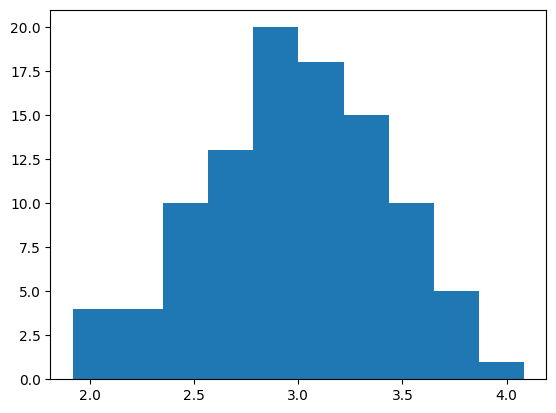

In [32]:
mu = 3.
sigma = 0.4
n_measures = 100
A = np.random.normal(mu,sigma,n_measures)
plt.hist(A)
plt.show()

We can double check that this sample comes from the correct distribution by estimating the parameters of the distribution using the `mean()` and `std()` functions on the data

In [33]:
print("The mean and spread of the distribution are {:.4f} and {:.4f}".format(mu,sigma))
print("The mean and spread of the data are {:.4f} and {:.4f}".format(A.mean(),A.std(ddof=1)))

The mean and spread of the distribution are 3.0000 and 0.4000
The mean and spread of the data are 2.9799 and 0.4462


We can use these samples to visualize what happens to our errors when we start doing operations with random variables (i.e. variables that have errors). The general formula that we want to use for error propagation applies to a generic function of multiple random variables, $y=f(A,B,...)$. Given the expression of $y$, and assuming that the random variables are uncorrelated, the error on the result is $\sigma_y^2 = \left|\frac{\partial f}{\partial A}\right|^2\sigma_A^2 + \left|\frac{\partial f}{\partial B}\right|^2\sigma_B^2 + ...$

For the simpler case of a function of a single random variable, $y=f(A)$, the result simplifies to $\sigma_y = \left|\frac{df}{dA}\right|\sigma_A$. We can check some examples below


In [34]:
n_measures=10000
mu_a = 3.
sigma_a = 0.4
A = np.random.normal(mu_a,sigma_a,n_measures)
funct = lambda x : x**2 # this is a fancy way of Python of defining a function of x in a single line
C = funct(A)
dfunct = lambda x : 2*x # for the error propagation we also need the derivative of the function wrt x

In [35]:
error_propagation = dfunct(A.mean())*A.std(ddof=1)
print("The error on the result is {:0.3f}, while the propagation of error formula gives us {:.3f}".format(C.std(ddof=1),error_propagation))

The error on the result is 2.394, while the propagation of error formula gives us 2.391


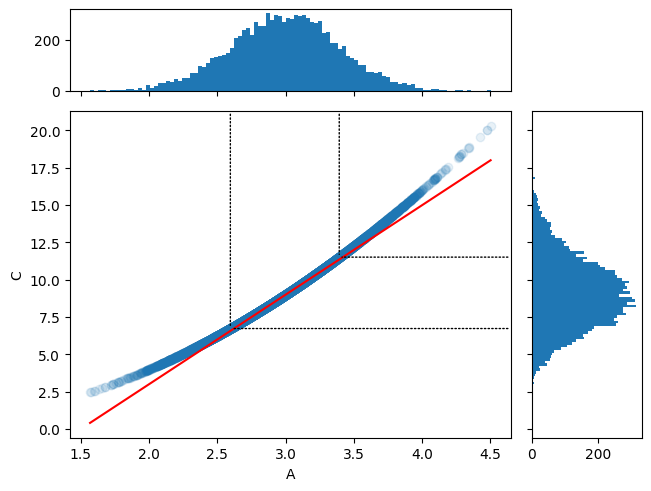

In [36]:
# Create a Figure, which doesn't have to be square.
fig = plt.figure(constrained_layout=True)
# Create the main axes, leaving 25% of the figure space at the top and on the
# right to position marginals.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.
ax.scatter(A,C,alpha=0.1)
ax.set_xlabel('A')
ax.set_ylabel('C')

ax_histx.tick_params(axis="x", labelbottom=False)
ax_histx.hist(A,bins=100)

ax_histy.tick_params(axis="y", labelleft=False)
ax_histy.hist(C, bins=100, orientation='horizontal')

x=np.linspace(A.min(),A.max(),100)
y=funct(A.mean())+dfunct(A.mean())*(x-A.mean())
ax.plot(x,y,'red')

ax.annotate("",
            xy=(A.mean()-A.std(), funct(A.mean()-A.std())), xycoords='data',
            xytext=(A.mean()-A.std(), ax.get_ylim()[1]), textcoords='data',
            arrowprops=dict(arrowstyle="-", linestyle=":")
            )
ax.annotate("",
            xy=(A.mean()+A.std(), funct(A.mean()+A.std())), xycoords='data',
            xytext=(A.mean()+A.std(), ax.get_ylim()[1]), textcoords='data',
            arrowprops=dict(arrowstyle="-", linestyle=":")
            )
ax.annotate("",
            xy=(A.mean()-A.std(), funct(A.mean()-A.std())), xycoords='data',
            xytext=(ax.get_xlim()[1], funct(A.mean()-A.std())), textcoords='data',
            arrowprops=dict(arrowstyle="-", linestyle=":")
            )
ax.annotate("",
            xy=(A.mean()+A.std(), funct(A.mean()+A.std())), xycoords='data',
            xytext=(ax.get_xlim()[1], funct(A.mean()+A.std())), textcoords='data',
            arrowprops=dict(arrowstyle="-", linestyle=":")
            )

plt.show()

What happens when we have multiple random variables? We can generate multiple samples with different centers and spreads and see how error propagation applies to this case.

In [37]:
n_measures = 10000
mu_a = 0.
sigma_a = 0.4
mu_b = 0.
sigma_b = 0.4
A = np.random.normal(mu_a,sigma_a,n_measures)
B = np.random.normal(mu_b,sigma_b,n_measures)
C = A + B

For the simple case of the sum of two random variables, doing the math on the general formula reported above shows that the variance of the result is the sum of the variances of the random variables, i.e. $\sigma_{A+B}^2 = \sigma_A^2 + \sigma_B^2$.

In [38]:
error_propagation = np.sqrt(A.var(ddof=1) + B.var(ddof=1))
print("The error on the result is {:0.3f}, while the propagation of error formula gives us {:.3f}".format(C.std(ddof=1),error_propagation))

The error on the result is 0.559, while the propagation of error formula gives us 0.562


We can also see in the histograms that the spread of the sum is not twice as big the spread of the individual random variables.

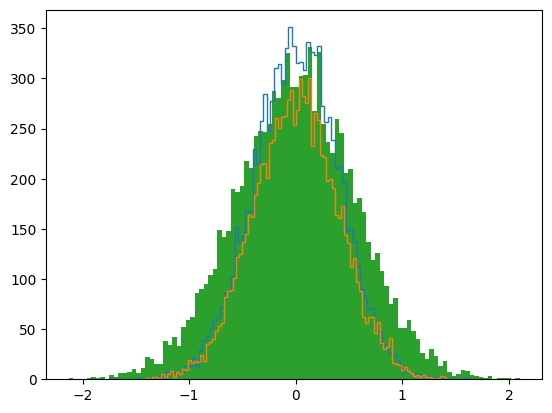

In [39]:
plt.hist(A,histtype='step',bins=100)
plt.hist(B,histtype='step',bins=100)
plt.hist(C,bins=100)
plt.show()

In fact, by generalizing this formula to the sum of $N$ random variables taken from the same distribution, we can easily get the expression of the standard error of the mean. 

It is instructive to check what happens if instead of summing two different variables, we sum the same variable, $C=A+A$
> CHALLENGE 1: Is the result of the error propagation formula still correct? Why or why not?